In [8]:
# Do the necessary imports
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [9]:
# this block only needs to be run once

# from qiskit import IBMQ
# IBMQ.save_account('2295eb6b30c26aecc9b9ecb0677b769a8e3a606479658709d13cd7301349ce07965760ac5eeb2fbb1e9cb741bdfc881058301125aaa6e1a703beedc07bb9db94')

# provider = IBMQ.load_account()
# backend = provider.get_backend('ibmq_quito')

In [ ]:
# superposition, simulate all vectors in R^n

def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [37]:
# diffuser

def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [10]:
# oracle

# TODO: now only for two vectors, with a single controlled bit
# def othonormal_swap_oracle(n_qubit):
#     qc = QuantumCircuit(3)

#     # for qubit in range(n_quibit - 1):
        
#     qc.cswap(0,1,2)
    
#     U_o


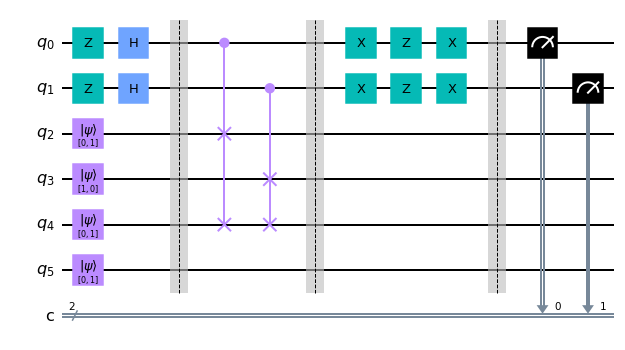

In [107]:
tc = QuantumCircuit(6,2)

tc.z(0)
tc.z(1)
tc.h(0)
tc.h(1)

tc.initialize([0,1], 2) # this is the orthonormal case
tc.initialize([1,0], 3)
tc.initialize([0,1], 4)
tc.initialize([0,1], 5)

tc.barrier()
# oracle
tc.cswap(0,2,4)
tc.cswap(1,3,4)

tc.barrier()
# tc.h(0)
# tc.h(1)
# tc.barrier()

nqubits = 2

# phase amplifier
# for qubit in range(nqubits):
#     tc.h(qubit)
# # Apply transformation |00..0> -> |11..1> (X-gates)
# for qubit in range(nqubits):
#     tc.x(qubit)
# # Do multi-controlled-Z gate
# tc.h(nqubits-1)
# tc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
# tc.h(nqubits-1)
# # Apply transformation |11..1> -> |00..0>
# for qubit in range(nqubits):
#     tc.x(qubit)
# # Apply transformation |00..0> -> |s>
# for qubit in range(nqubits):
#     tc.h(qubit)

tc.x(0)
tc.z(0)
tc.x(0)

tc.x(1)
tc.z(1)
tc.x(1)
    
# tc.h([0,1])
# tc.z([0,1])
# tc.cz(0,1)
# tc.h([0,1])

tc.barrier()

tc.measure(0,0)
tc.measure(1,1)

tc.draw('mpl')

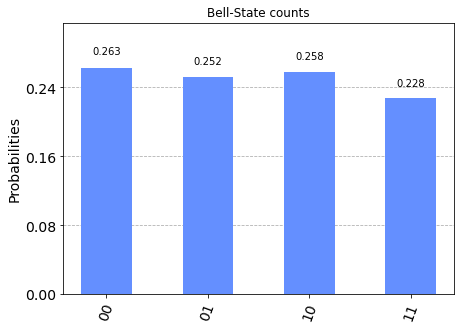

In [108]:
sim = Aer.get_backend('aer_simulator')
tc.save_statevector()

result = sim.run(tc).result()
counts = result.get_counts(tc)
plot_histogram(counts, title='Bell-State counts')

In [116]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

backend = Aer.get_backend('statevector_simulator')
qinstance = QuantumInstance(backend, seed_simulator=2, seed_transpiler=2)

In [120]:
def is_good_state(bitstr):
    return sum(map(int, bitstr)) != 0

In [122]:
###########################################################
###### try the capsulated Grover package from qiskit ######
###########################################################


from qiskit.algorithms import Grover, AmplificationProblem

import numpy as np

# all state except 00 are good states
oracle = QuantumCircuit(2)
oracle.z(0)
oracle.z(1)
oracle.cz(0,1)

state_preparation = QuantumCircuit(5)
state_preparation.h(0)
state_preparation.h(1)
state_preparation.initialize([0,1], 2) # this is the orthonormal case
state_preparation.initialize([1,0], 3)
state_preparation.initialize([0,1], 4)

state_preparation.cswap(0,2,4)
state_preparation.cswap(1,3,4)


problem = AmplificationProblem(oracle=oracle, is_good_state=['11'])
grover = Grover(quantum_instance=qinstance)
result = grover.amplify(problem)
print('Top measurement:', result.top_measurement)

IndexError: index 0 is out of bounds for axis 0 with size 0